In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

PATH_TO_DATA = '../data/'
PATH_TO_OUTPUT_DATA = '../output-data/'

In [2]:
# concat all rows 
MLB_GAME_DF = []
for i in os.listdir(PATH_TO_DATA + 'game/'):
    temp_df = pd.read_csv(PATH_TO_DATA + 'game/' + i, header = None)
    if (len(MLB_GAME_DF) == 0):
        MLB_GAME_DF = temp_df
    else:
        MLB_GAME_DF = pd.concat(
            [MLB_GAME_DF, temp_df], axis = 0)
        
MLB_GAME_DF.sort_values(by = [0], inplace = True)

In [3]:
# first 21 columns for metadata
initial_columns = [
    'date',
    'number', 
    'day_of_week',
    'away_team', 
    'away_league', 
    'away_game_number',
    'home_team',
    'home_league',
    'home_game_number',
    'away_score',
    'home_score',
    'num_outs',
    'day_night',
    'completion',
    'forfeit',
    'protest',
    'park_id',
    'attendance', 
    'length_minutes',
    'visiting_line_score',
    'home_line_score',
]
initial_col_dict = dict(zip(
    [i for i in range(22)],     
    initial_columns))

In [4]:
# columns for players and pitchers
player_columns = [
    'away_pitcher_id',
    'away_pitcher_name',
    'home_pitcher_id',
    'home_pitcher_name'
]

for i in range(9):
    player_columns.append('away_' + str(i + 1) + '_id')
    player_columns.append('away_' + str(i + 1) + '_name')
    player_columns.append('away_' + str(i + 1) + '_pos')

for i in range(9):
    player_columns.append('home_' + str(i + 1) + '_id')
    player_columns.append('home_' + str(i + 1) + '_name')
    player_columns.append('home_' + str(i + 1) + '_pos')

player_columns.append('additional_info')
player_columns.append('acquisition')

player_col_dict = dict(zip(
    [i + 101 for i in range(len(player_columns))],     
    player_columns))

In [5]:
MLB_GAME_DF.rename(initial_col_dict, axis = 1, inplace = True)
MLB_GAME_DF.rename(player_col_dict, axis = 1, inplace = True)

In [6]:
MLB_GAME_DF = MLB_GAME_DF[initial_columns + player_columns]

Drop all invalid games and rows

In [7]:
MLB_GAME_DF_CLEAN = MLB_GAME_DF.copy()

# no forfeits 
MLB_GAME_DF_CLEAN.forfeit.unique()

array([nan])

In [8]:
MLB_GAME_DF_CLEAN = MLB_GAME_DF_CLEAN[pd.isnull(
    MLB_GAME_DF_CLEAN['completion'])]

In [9]:
# number of completed laters
len(MLB_GAME_DF) - len(MLB_GAME_DF_CLEAN)

32

In [10]:
# remove games without data
print(len(MLB_GAME_DF_CLEAN))
MLB_GAME_DF_CLEAN = MLB_GAME_DF_CLEAN[
    MLB_GAME_DF_CLEAN.acquisition == 'Y']
print(len(MLB_GAME_DF_CLEAN))

48556
48556


Trim for only important player data

In [11]:
MLB_GAME_DF_CLEAN['Y'] = MLB_GAME_DF_CLEAN['date'].apply(
lambda x: str(x)[0:4])
MLB_GAME_DF_CLEAN['M'] = MLB_GAME_DF_CLEAN['date'].apply(
lambda x: str(x)[4:6])
MLB_GAME_DF_CLEAN['D'] = MLB_GAME_DF_CLEAN['date'].apply(
lambda x: str(x)[6:8])
MLB_GAME_DF_CLEAN

,date,number,day_of_week,away_team,away_league,away_game_number,home_team,home_league,home_game_number,away_score,...,home_8_name,home_8_pos,home_9_id,home_9_name,home_9_pos,additional_info,acquisition,Y,M,D
0,20000329,0,Wed,CHN,NL,1,NYN,NL,1,5,...,Rey Ordonez,6,hampm001,Mike Hampton,1,NaN,Y,2000,03,29
1,20000330,0,Thu,NYN,NL,2,CHN,NL,2,5,...,Joe Girardi,2,farnk001,Kyle Farnsworth,1,NaN,Y,2000,03,30
3,20000403,0,Mon,MIL,NL,1,CIN,NL,1,3,...,Michael Tucker,7,harnp001,Pete Harnisch,1,NaN,Y,2000,04,03
2,20000403,0,Mon,COL,NL,1,ATL,NL,1,0,...,Walt Weiss,6,maddg002,Greg Maddux,1,NaN,Y,2000,04,03
13,20000403,0,Mon,KCA,AL,1,TOR,AL,1,4,...,Jose Cruz,8,gonza001,Alex Gonzalez,6,NaN,Y,2000,04,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,20190929,0,Sun,ATL,NL,162,NYN,NL,162,6,...,Tomas Nido,2,syndn001,Noah Syndergaard,1,NaN,Y,2019,09,29
2415,20190929,0,Sun,MIL,NL,162,COL,NL,162,3,...,Tony Wolters,2,hoffj003,Jeff Hoffman,1,NaN,Y,2019,09,29
2414,20190929,0,Sun,SDN,NL,162,ARI,NL,162,0,...,Caleb Joseph,2,walkt004,Taijuan Walker,1,NaN,Y,2019,09,29
2422,20190929,0,Sun,HOU,AL,162,ANA,AL,162,8,...,Matt Thaiss,5,bemba001,Anthony Bemboom,2,NaN,Y,2019,09,29


In [12]:
MLB_GAME_DF_CLEAN['scoreDiff'] = MLB_GAME_DF_CLEAN['home_score'] -\
MLB_GAME_DF_CLEAN['away_score']

MLB_GAME_DF_CLEAN['outcome'] = MLB_GAME_DF_CLEAN['scoreDiff'].apply(
lambda x: 1 if x > 0 else 0)

MLB_GAME_DF_CLEAN = MLB_GAME_DF_CLEAN.reset_index(drop = True)

In [22]:
MLB_GAME_DF_CLEAN['outcome'].mean()

0.5387799654007743

In [13]:
# we can keep Y, M, D but won't need them for actual Elo
final_cols = [
    'dt',
    'Y',
    'M',
    'D',
    'away_team',
    'home_team',
    'away_score',
    'home_score',
    'away_pitcher_id',
    'home_pitcher_id',
]

for i in range(9):
    final_cols.append('away_' + str(i + 1) + '_id')

for i in range(9):
    final_cols.append('home_' + str(i + 1) + '_id')

final_cols.append('outcome') # response variable

In [14]:
# Convert to datetimes
import datetime as dt
MLB_GAME_DF_CLEAN.loc[i, 'Y']

'2000'

In [15]:
MLB_GAME_DF_CLEAN['dt'] = None
for i in range(len(MLB_GAME_DF_CLEAN)):
    MLB_GAME_DF_CLEAN.loc[i, 'dt'] = dt.date(int(MLB_GAME_DF_CLEAN.loc[i, 'Y']), 
                                          int(MLB_GAME_DF_CLEAN.loc[i, 'M']), 
                                          int(MLB_GAME_DF_CLEAN.loc[i, 'D']))
    if (i % 10000 == 0):
        print(MLB_GAME_DF_CLEAN.loc[i, 'dt'])
MLB_GAME_DF_CLEAN['dt']

2000-03-29
2004-04-27
2008-05-12
2012-06-08
2016-06-28


0        2000-03-29
1        2000-03-30
2        2000-04-03
3        2000-04-03
4        2000-04-03
            ...    
48551    2019-09-29
48552    2019-09-29
48553    2019-09-29
48554    2019-09-29
48555    2019-09-29
Name: dt, Length: 48556, dtype: object

In [16]:
MLB_GAME_DF_FINAL = MLB_GAME_DF_CLEAN[final_cols]

In [17]:
MLB_GAME_DF_FINAL

,dt,Y,M,D,away_team,home_team,away_score,home_score,away_pitcher_id,home_pitcher_id,...,home_1_id,home_2_id,home_3_id,home_4_id,home_5_id,home_6_id,home_7_id,home_8_id,home_9_id,outcome
0,2000-03-29,2000,03,29,CHN,NYN,5,3,liebj001,hampm001,...,hendr001,hamid001,alfoe001,piazm001,ventr001,belld001,zeilt001,ordor001,hampm001,0
1,2000-03-30,2000,03,30,NYN,CHN,5,1,reedr002,farnk001,...,youne001,bufod001,sosas001,gracm001,rodrh001,andrs001,husoj001,giraj001,farnk001,0
2,2000-04-03,2000,04,03,MIL,CIN,3,3,woods001,harnp001,...,reesp001,larkb001,grifk002,bichd001,yound001,taube001,boona001,tuckm001,harnp001,0
3,2000-04-03,2000,04,03,COL,ATL,0,2,astap001,maddg002,...,veraq001,sandr002,jonec004,jordb001,galaa001,jonea002,peree002,weisw001,maddg002,1
4,2000-04-03,2000,04,03,KCA,TOR,4,5,suppj001,welld001,...,stews002,bushh001,mondr002,delgc001,fullb001,batit001,fletd001,cruzj004,gonza001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48551,2019-09-29,2019,09,29,ATL,NYN,6,7,sorom001,syndn001,...,nimmb001,alonp001,confm001,canor001,davij006,rosaa003,frazt001,nidot001,syndn001,1
48552,2019-09-29,2019,09,29,MIL,COL,3,4,housa001,hoffj003,...,hampg001,hills005,blacc001,mcmar001,tapir001,fuenj001,valap001,woltt001,hoffj003,1
48553,2019-09-29,2019,09,29,SDN,ARI,0,1,baezm001,walkt004,...,florw001,ahmen001,escoe001,walkc002,rojaj001,locat001,dysoj001,josec002,walkt004,1
48554,2019-09-29,2019,09,29,HOU,ANA,8,5,coleg001,peted001,...,lastt001,fletd002,goodb001,pujoa001,calhk001,simma001,wardt002,thaim001,bemba001,0


In [18]:
print(list(MLB_GAME_DF_FINAL))

['dt', 'Y', 'M', 'D', 'away_team', 'home_team', 'away_score', 'home_score', 'away_pitcher_id', 'home_pitcher_id', 'away_1_id', 'away_2_id', 'away_3_id', 'away_4_id', 'away_5_id', 'away_6_id', 'away_7_id', 'away_8_id', 'away_9_id', 'home_1_id', 'home_2_id', 'home_3_id', 'home_4_id', 'home_5_id', 'home_6_id', 'home_7_id', 'home_8_id', 'home_9_id', 'outcome']


Data cleaning

In [65]:
def remove_duplicate_teams(tm):
    if (tm == 'FLO'):
        return 'MIA'
    if (tm == 'MON'):
        return 'WAS'
    return tm

MLB_GAME_DF_FINAL['home_team'] = MLB_GAME_DF_FINAL[
    'home_team'].apply(remove_duplicate_teams)

MLB_GAME_DF_FINAL['away_team'] = MLB_GAME_DF_FINAL[
    'away_team'].apply(remove_duplicate_teams)

print(MLB_GAME_DF_FINAL['home_team'].nunique())
print(MLB_GAME_DF_FINAL['away_team'].nunique())

30
30


<ipython-input-65-0ede28c50777>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MLB_GAME_DF_FINAL['home_team'] = MLB_GAME_DF_FINAL[
<ipython-input-65-0ede28c50777>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MLB_GAME_DF_FINAL['away_team'] = MLB_GAME_DF_FINAL[


EDA and validation

<ipython-input-66-784621739d2f>:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  HOME_WIN_RATE.to_csv(PATH_TO_OUTPUT_DATA + '/EDA/'


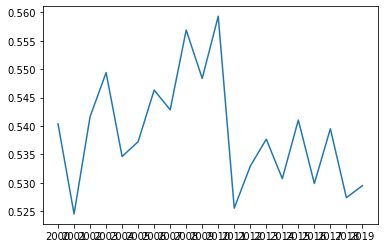

In [66]:
HOME_WIN_RATE = MLB_GAME_DF_FINAL.groupby('Y').outcome.mean()
plt.plot(HOME_WIN_RATE)
HOME_WIN_RATE.to_csv(PATH_TO_OUTPUT_DATA + '/EDA/'
                     'YEARLY_HOME_WIN_RATE.csv', index = True)

In [67]:
# MLB_GAME_DF_FINAL.groupby('home_team')['outcome'].sum()

# Computing away team wins
away_W = pd.DataFrame(MLB_GAME_DF_FINAL[MLB_GAME_DF_FINAL.outcome == 0].rename({
    'away_team': 'team'
}, axis = 1).groupby(
    ['Y', 'team'])['outcome'].count()).rename({'outcome': 'W'}, 
                                           axis = 1)


home_W = pd.DataFrame(MLB_GAME_DF_FINAL.rename({
    'home_team': 'team'
}, axis = 1).groupby(
    ['Y', 'team'])['outcome'].sum()).rename({'outcome': 'W'}, 
                                           axis = 1)

total_W = home_W + away_W

# Computing losses
total_games = pd.DataFrame(MLB_GAME_DF_FINAL.rename({
    'away_team': 'team'
}, axis = 1).groupby(
    ['Y', 'team'])['outcome'].count() + (MLB_GAME_DF_FINAL.rename({
    'home_team': 'team'
}, axis = 1).groupby(
    ['Y', 'team'])['outcome'].count())).rename({'outcome': 'GP'},
                                              axis = 1)

W_L = total_W.copy().reset_index().merge(
    total_games.reset_index())
W_L['L'] = W_L['GP'] - W_L['W']
W_L = W_L[['Y', 'team', 'GP', 'W', 'L']]
# W_L['L'] = W_L['GP'] - W_L['outcome']

In [68]:
W_L.to_csv(PATH_TO_OUTPUT_DATA + '/EDA/'
                     'W_L_DATA.csv', index = False)

In [24]:
W_L = pd.read_csv(PATH_TO_OUTPUT_DATA + '/EDA/'
                     'W_L_DATA.csv')

In [28]:
W_L[W_L.Y == 2000].drop(labels = ['Y', 'GP'], axis = 1).set_index('team')

,W,L
team,,
ANA,82,80
ARI,85,77
ATL,95,67
BAL,74,88
BOS,85,77
CHA,95,67
CHN,65,97
CIN,85,78
CLE,90,72


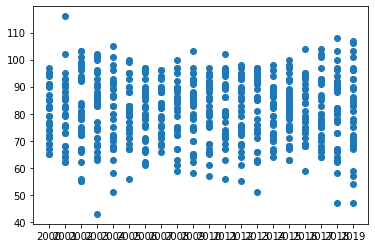

In [69]:
plt.scatter(W_L['Y'], W_L['W'])

Game data

In [ ]:
# convert to dt
MLB_GAME_DF_FINAL['dt'] = MLB_GAME_DF_FINAL['dt'].apply(lambda x:
                                                        dt.datetime.strptime(str(x), '%Y-%m-%d'))

In [80]:
MLB_GAME_DF_FINAL.dt

0       2000-03-29
1       2000-03-30
2       2000-04-03
3       2000-04-03
4       2000-04-03
           ...    
48551   2019-09-29
48552   2019-09-29
48553   2019-09-29
48554   2019-09-29
48555   2019-09-29
Name: dt, Length: 48556, dtype: datetime64[ns]

In [81]:
MLB_GAME_DF_FINAL.to_csv(PATH_TO_OUTPUT_DATA + 'GAME_LEVEL.csv',
                        index = False)